# Check the quality of the input data

This notebook can be used to check the quality of all the input data used in the SFINCS model. The validity of the model results can be derived from these insights.

#### Import packages

In [3]:
# package import
import os
from pathlib import Path
import sys
import pandas as pd
import rasterio

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import geopandas as gpd
import hydromt
import numpy as np
import matplotlib.pyplot as plt
from hydromt.log import setuplog
from hydromt_sfincs import SfincsModel
from rasterio.plot import show

# local script imports
from sfincs_utils import run_sfincs, create_sfincs_model_archive

#### Read all input data

In [ ]:
gauging_locations = None
gauging_timeseries = None
with rasterio.open('../data/gebco.tif') as src:
    gebco_data = src.read(1)
    gebco_nodata = src.nodata
    gebco_clean_data = gebco_data[gebco_data != gebco_nodata]
    gebco_mean, gebco_std = np.mean(gebco_clean_data), np.std(gebco_clean_data)
with rasterio.open('../data/MRLC_landcover.tiff') as src:
    landcover_data = src.read(1)
    landcover_nodata = src.nodata
    landcover_clean_data = landcover_data[landcover_data != landcover_nodata]
    landcover_mean, landcover_std = np.mean(landcover_clean_data), np.std(landcover_clean_data)
landcover_mapping = pd.read_csv("../data/MRLC_landcover_mapping.csv")
osm_land_areas = gpd.read_file("../data/osm_landareas.gpkg").to_crs(epsg=4326)
with rasterio.open('../data/topography_Savannah_10m.tif') as src:
    DEM_3D_10m_data = src.read(1)
    DEM_3D_10m_nodata = src.nodata
    DEM_3D_10m_clean_data = DEM_3D_10m_data[DEM_3D_10m_data != DEM_3D_10m_nodata]
    DEM_3D_10m_mean, DEM_3D_10m_std = np.mean(DEM_3D_10m_clean_data), np.std(DEM_3D_10m_clean_data)
with rasterio.open('../data/topography_Savannah_CoNED_G.tiff') as src:
    CoNED_G_data = src.read(1)
    CoNED_G_nodata = src.nodata
    CoNED_G_clean_data = CoNED_G_data[CoNED_G_data != CoNED_G_nodata]
    CoNED_G_mean, CoNED_G_std = np.mean(CoNED_G_clean_data), np.std(CoNED_G_clean_data)
with rasterio.open('../data/topography_Savannah_CoNED_SC.tiff') as src:
    CoNED_SC_data = src.read(1)
    CoNED_SC_nodata = src.nodata
    CoNED_SC_clean_data = CoNED_SC_data[CoNED_SC_data != CoNED_SC_nodata]
    CoNED_SC_mean, CoNED_SC_std = np.mean(CoNED_SC_clean_data), np.std(CoNED_SC_clean_data)
model_domain = gpd.read_file("../model_domain/model_domain_savannah.geojson").to_crs(epsg=4326)
obs_points = gpd.read_file("../model_domain/obs_points_savannah.geojson").to_crs(epsg=4326)
wl_mask = gpd.read_file("../model_domain/waterlevel_mask_savannah.geojson").to_crs(epsg=4326)

#### Visualise inputs

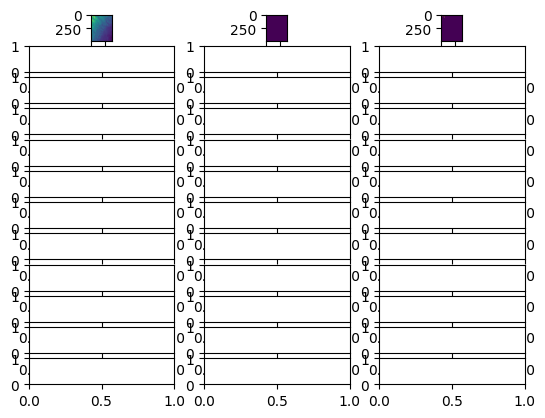

In [ ]:
gebco_missing_mask = (gebco_data == gebco_nodata)
gebco_outlier_mask = (np.abs(gebco_data - gebco_mean) > 3 * gebco_std) & (gebco_data != gebco_nodata)

fig, ax = plt.subplots(12, 3)

ax[0,0].imshow(gebco_data, cmap='viridis')
ax[0,1].imshow(gebco_missing_mask)
ax[0,2].imshow(gebco_outlier_mask)

plt.show()